In [2]:
library(ggmap)
library(dplyr)
library(VGAM)
citation("ggmap")

Loading required package: ggplot2

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: stats4

Loading required package: splines




To cite ggmap in publications, please use:

  D. Kahle and H. Wickham. ggmap: Spatial Visualization with ggplot2.
  The R Journal, 5(1), 144-161. URL
  http://journal.r-project.org/archive/2013-1/kahle-wickham.pdf

A BibTeX entry for LaTeX users is

  @Article{,
    author = {David Kahle and Hadley Wickham},
    title = {ggmap: Spatial Visualization with ggplot2},
    journal = {The R Journal},
    year = {2013},
    volume = {5},
    number = {1},
    pages = {144--161},
    url = {https://journal.r-project.org/archive/2013-1/kahle-wickham.pdf},
  }


In [3]:
training <- read.csv("data/train.csv")
holdout <- read.csv("data/test.csv")
mean(training$Longitude)
head(training)
set.seed(12489)

[1] -77.91649

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,⋯,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1921357,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
2,1921358,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
3,1921359,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
4,1921360,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
5,1921361,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
6,1921362,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,2,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta


In [4]:
drilled_down_training <- group_by(training, IntersectionId, EntryHeading, ExitHeading)
summarise_at(drilled_down_training, vars(TimeFromFirstStop_p80),list(mean=mean,median=median))

IntersectionId,EntryHeading,ExitHeading,mean,median
<int>,<chr>,<chr>,<dbl>,<dbl>
0,E,E,5.6484375,0.0
0,E,N,20.2173913,21.0
0,E,NW,34.0000000,34.0
0,E,SW,39.0000000,42.0
0,N,E,66.2352941,58.0
0,N,N,64.7794118,62.0
0,N,W,79.1428571,69.0
0,NE,E,38.0000000,38.0
0,NE,N,52.1363636,43.0


In [13]:
RMSE = function(predicted, expected, log=0){
  if (log == 0){
      sqrt(mean((predicted - expected)^2))
  } else {
      temp <- which(predicted == 0)
      epred <- exp(predicted)
      epred[temp] <- 0
      sqrt(mean((epred- expected)^2)) 
  }
}

kfold <- function(nn, k, modelWrapper,data, log=0) {
  foldsize = nn/k
  folds = list()
  initial_pool = c(1:nn)
  current_sample = initial_pool
  exhausted_pool = c()
  for (i in 1:(k-1)){
    itrain=sample(current_sample, foldsize)
    folds[[i]]=sort(itrain)
    exhausted_pool <- append(exhausted_pool,itrain)
    current_sample= initial_pool[-exhausted_pool]
  }
  folds[[k]] = current_sample

  perf_measures = list()
  for (i in 1:k){
    train_indexes = unlist(folds[c(1:k)[-i]])
    holdout_indexes=unlist(folds[c(1:k)[i]])

    train = data[train_indexes,]
    holdo = data[holdout_indexes,]

    model <- modelWrapper(train)
    outPredict <- predict(model, newdata=holdo,interval = "prediction")
    if (identical(modelWrapper, tobitModelWrapper)){
        head(outPredict)
        ineg = which(outPredict[,1]<0)
        outPredict[ineg,1] = 0
        fit <- outPredict[,1]
        lwr <- outPredict[,1] - qnorm(0.975)*exp(outPredict[,2])
        upr <- outPredict[,1] + qnorm(0.975)*exp(outPredict[,2])
        outPredict <- cbind(fit,lwr,upr)
        head(outPredict)
    }
      
    if (log == 0) {
#       perf_measures[[i]] <- RMSE(outPredict, holdo$TotalTimeStopped_p50)
        perf_measures[[i]] <- intervalScore(outPredict, holdo$TotalTimeStopped_p50, 0.2)[3]
    } else {
#       perf_measures[[i]] <- RMSE(outPredict, holdo$TotalTimeStopped_p50, log=1)
        temp <- which(holdo$TotalTimeStopped_p50 == 0)
        logActual <- log(holdo$TotalTimeStopped_p50)
        logActual[temp] <- 0
        
        perf_measures[[i]] <- intervalScore(outPredict, logActual, 0.2)[3]
    }
  }
  mean(unlist(perf_measures))
}

augmentRightTurn <- function(dataset) {
    isRightTurn <- function(entry, exit) {
        rightexit <- list(
            N = c("NW", "W", "SW"),
            NW = c("W", "SW", "S"),
            W = c("SW", "S", "SE"),
            SW = c("S", "SE", "E"),
            S = c("SE", "E", "NE"),
            SE = c("E", "NE", "N"),
            E = c("NE", "N", "NW"),
            NE = c("N", "NW", "W")
        )
        exit %in% rightexit[[entry]]
    }
    vIsRightTurn <- Vectorize(isRightTurn)
    temp <- dataset %>% 
        mutate(RightTurn = vIsRightTurn(EntryHeading, ExitHeading)) %>%
        group_by(IntersectionId, EntryHeading) %>%
        summarize(RightTurnAllowed = max(RightTurn)) %>%
        inner_join(dataset)
    temp %>% mutate(RightTurn = ifelse(vIsRightTurn(EntryHeading, ExitHeading), 1, 0))
}

augmentLeftTurn <- function(dataset) {
    isLeftTurn <- function(entry, exit) {
        leftexit <- list(
            N = c("NE", "E", "SE"),
            NW = c("N", "NE", "E"),
            W = c("NW", "N", "NE"),
            SW = c("W", "NW", "N"),
            S = c("SW", "W", "NW"),
            SE = c("S", "SW", "W"),
            E = c("SE", "S", "SW"),
            NE = c("E", "SE", "S")
        )
        exit %in% leftexit[[entry]]
    }
    vIsLeftTurn <- Vectorize(isLeftTurn)
    temp <- dataset %>% 
        mutate(LeftTurn = vIsLeftTurn(EntryHeading, ExitHeading)) %>%
        group_by(IntersectionId, EntryHeading) %>%
        summarize(LeftTurnAllowed = max(LeftTurn)) %>%
        inner_join(dataset)
    temp %>% mutate(LeftTurn = ifelse(vIsLeftTurn(EntryHeading, ExitHeading), 1, 0))
}

transformDataset <- function(dataset){
    augmented <- augmentRightTurn(training)
    augmented <- augmentLeftTurn(augmented)
    augmented <- augmented %>% mutate(straightThrough = ifelse(EntryHeading == ExitHeading, 1, 0))
    augmented <- augmented %>% mutate(
    JanAndMay = ifelse(Month == 1 | Month == 5, 1, 0),
    rushHour = ifelse((Hour >= 6 & Hour <= 9) | (Hour >= 15 & Hour <= 18), 1, 0),
    hasWaitTime = ifelse(DistanceToFirstStop_p50 > 0 & TimeFromFirstStop_p50 > 0, 1, 0),
    logTotalTimeStopped_p50 = ifelse(hasWaitTime == 1, log(TotalTimeStopped_p50), TotalTimeStopped_p50))
    augmented
}

#' interval score function for prediction intervals,
#' smaller value is better
#'
#' @description
#' interval score for prediction intervals
#'
#' @param predobj has 3 (or more) columns: pointprediction, predLB, predUB
#' @param actual vector of actual values (in holdout set, for example)
#' @param alpha level for prediction interval, 
#'  1-alpha is expected coverage proportion if model is valid;
#'  alpha=0.2 for 80% prediction intervals
#'
#' @return interval score 
#'
intervalScore=function(predObj,actual,alpha)
{ n=nrow(predObj)
    ilow=(actual<predObj[,2]) # underestimation
    ihigh=(actual>predObj[,3]) # overestimation
    sumlength=sum(predObj[,3]-predObj[,2]) # sum of lengths of prediction intervals
    sumlow=sum(predObj[ilow,2]-actual[ilow])*2/alpha
    sumhigh=sum(actual[ihigh]-predObj[ihigh,3])*2/alpha
    avglength=sumlength/n
    IS=(sumlength+sumlow+sumhigh)/n # average length + average under/over penalties
    cover=mean(actual>= predObj[,2] & actual<=predObj[,3])
    summ=c(1-alpha,avglength,IS,cover)
    summ
}



In [14]:
augmentedTraining <- transformDataset(training)
augmentedHoldout <- transformDataset(holdout)



`summarise()` has grouped output by 'IntersectionId'. You can override using the `.groups` argument.

Joining, by = c("IntersectionId", "EntryHeading")

`summarise()` has grouped output by 'IntersectionId'. You can override using the `.groups` argument.

Joining, by = c("IntersectionId", "EntryHeading")

`summarise()` has grouped output by 'IntersectionId'. You can override using the `.groups` argument.

Joining, by = c("IntersectionId", "EntryHeading")

`summarise()` has grouped output by 'IntersectionId'. You can override using the `.groups` argument.

Joining, by = c("IntersectionId", "EntryHeading")



In [15]:
head(augmentedTraining)
names(augmentedTraining)

IntersectionId,EntryHeading,LeftTurnAllowed,RightTurnAllowed,RowId,Latitude,Longitude,EntryStreetName,ExitStreetName,ExitHeading,⋯,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,RightTurn,LeftTurn,straightThrough,JanAndMay,rushHour,hasWaitTime,logTotalTimeStopped_p50
<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,E,1,1,2077842,42.29174,-71.07718,Talbot Avenue,Talbot Avenue,E,⋯,58.7,78.6,Boston,0,0,1,0,1,0,0.000000
0,E,1,1,2077854,42.29174,-71.07718,Talbot Avenue,New England Avenue,SW,⋯,0.0,106.9,Boston,0,1,0,0,0,0,0.000000
0,E,1,1,2077855,42.29174,-71.07718,Talbot Avenue,Norwell Street,NW,⋯,72.5,103.0,Boston,1,0,0,0,0,1,2.484907
0,E,1,1,2077861,42.29174,-71.07718,Talbot Avenue,Talbot Avenue,E,⋯,0.0,106.8,Boston,0,0,1,0,1,0,0.000000
0,E,1,1,2077867,42.29174,-71.07718,Talbot Avenue,Talbot Avenue,E,⋯,69.2,75.6,Boston,0,0,1,0,1,1,2.079442
0,E,1,1,2077873,42.29174,-71.07718,Talbot Avenue,Talbot Avenue,E,⋯,62.8,71.3,Boston,0,0,1,0,1,0,0.000000


[1] "IntersectionId"          "EntryHeading"           
 [3] "LeftTurnAllowed"         "RightTurnAllowed"       
 [5] "RowId"                   "Latitude"               
 [7] "Longitude"               "EntryStreetName"        
 [9] "ExitStreetName"          "ExitHeading"            
[11] "Hour"                    "Weekend"                
[13] "Month"                   "Path"                   
[15] "TotalTimeStopped_p20"    "TotalTimeStopped_p40"   
[17] "TotalTimeStopped_p50"    "TotalTimeStopped_p60"   
[19] "TotalTimeStopped_p80"    "TimeFromFirstStop_p20"  
[21] "TimeFromFirstStop_p40"   "TimeFromFirstStop_p50"  
[23] "TimeFromFirstStop_p60"   "TimeFromFirstStop_p80"  
[25] "DistanceToFirstStop_p20" "DistanceToFirstStop_p40"
[27] "DistanceToFirstStop_p50" "DistanceToFirstStop_p60"
[29] "DistanceToFirstStop_p80" "City"                   
[31] "RightTurn"               "LeftTurn"               
[33] "straightThrough"         "JanAndMay"              
[35] "rushHour"                "hasWaitTime"            
[37] "logTotalTimeStopped_p50"

In [27]:
basicLinearModelWrapper <- function(data){
    lm(TotalTimeStopped_p50~hasWaitTime+Hour+rushHour+straightThrough+Weekend+JanAndMay+City+LeftTurnAllowed+RightTurnAllowed + LeftTurn+RightTurn, data=data)
    #summary(basicLinearModel)
}
rushLeftModelWrapper <- function(data){
    lm(TotalTimeStopped_p50~hasWaitTime+Hour+rushHour+LeftTurn*rushHour+straightThrough+Weekend+JanAndMay+City+LeftTurnAllowed+RightTurnAllowed+ LeftTurn+RightTurn, data=data)
    #summary(rushLeftModel)
}
rushModelWrapper <- function(data){
    lm(TotalTimeStopped_p50~hasWaitTime+Hour+Hour*rushHour+rushHour+LeftTurn*rushHour+straightThrough+straightThrough*rushHour+Weekend+Weekend*rushHour+JanAndMay+City+LeftTurnAllowed+RightTurnAllowed+ LeftTurn+RightTurn, data=data)
    #summary(rushModel)
}
monthModelWrapper <- function(data){
    lm(TotalTimeStopped_p50~hasWaitTime+Hour+Month+Hour*rushHour+rushHour+LeftTurn*rushHour+straightThrough+straightThrough*rushHour+Weekend+Weekend*rushHour+JanAndMay+City+LeftTurnAllowed+RightTurnAllowed+ LeftTurn+RightTurn, data=data)
}
straightInteractionModelWrapper <- function(data){
    lm(TotalTimeStopped_p50~hasWaitTime+Hour+Hour*rushHour+rushHour+LeftTurn*rushHour+straightThrough+straightThrough*rushHour+straightThrough*LeftTurnAllowed+straightThrough*RightTurnAllowed+Weekend+Weekend*rushHour+JanAndMay+City+LeftTurnAllowed+RightTurnAllowed+ LeftTurn+RightTurn, data=data)
}

logModelWrapper <- function(data){
    lm(logTotalTimeStopped_p50~hasWaitTime+Hour+Hour*rushHour+rushHour+LeftTurn*rushHour+straightThrough+straightThrough*rushHour+straightThrough*LeftTurnAllowed+straightThrough*RightTurnAllowed+Weekend+Weekend*rushHour+JanAndMay+City+LeftTurnAllowed+RightTurnAllowed+ LeftTurn+RightTurn, data=data)    
}

tobitModelWrapper <- function(data){
    vglm(TotalTimeStopped_p50~hasWaitTime+Hour+Hour*rushHour+rushHour+LeftTurn*rushHour+straightThrough+straightThrough*rushHour+straightThrough*LeftTurnAllowed+straightThrough*RightTurnAllowed+Weekend+Weekend*rushHour+JanAndMay+City+LeftTurnAllowed+RightTurnAllowed+ LeftTurn+RightTurn, tobit(Lower = 0), data = data)
}


totalRows = nrow(augmentedTraining)
k = 5 
print(kfold(totalRows, k, basicLinearModelWrapper,data=augmentedTraining))
print(kfold(totalRows, k, rushLeftModelWrapper,data=augmentedTraining))
print(kfold(totalRows, k, rushModelWrapper,data=augmentedTraining))
print(kfold(totalRows, k, monthModelWrapper,data=augmentedTraining))
print(kfold(totalRows, k, straightInteractionModelWrapper,data=augmentedTraining))
print(kfold(totalRows, k, logModelWrapper,data=augmentedTraining), log=1)
print(kfold(totalRows, k, tobitModelWrapper, data=augmentedTraining))



[1] 48.60951
[1] 48.6084
[1] 48.517
[1] 48.51646
[1] 48.46703
[1] 67.02132
[1] 381.3186


In [28]:
basicLinearModel <- basicLinearModelWrapper(augmentedTraining)
rushLeftModel <- rushLeftModelWrapper(augmentedTraining)
rushModel <- rushModelWrapper(augmentedTraining)
monthModel <- monthModelWrapper(augmentedTraining)
straightInteractionModel<- straightInteractionModelWrapper(augmentedTraining)
logModel<- logModelWrapper(augmentedTraining)
tobitModel <- tobitModelWrapper(augmentedTraining)

#Out Of Sample Predictions

In [29]:

outPredict1 <- predict(basicLinearModel, newdata=augmentedHoldout)
outPredict2 <- predict(rushLeftModel, newdata=augmentedHoldout)
outPredict3 <- predict(rushModel, newdata=augmentedHoldout)
outPredict4 <- predict(monthModel, newdata=augmentedHoldout)
outPredict5 <- predict(straightInteractionModel, newdata=augmentedHoldout)
outPredict6 <- predict(logModel, newdata=augmentedHoldout)
outpredict7 <- predict(tobitModel, newdata=augmentedHoldout)

RMSE1 <- RMSE(outPredict1, augmentedHoldout$TotalTimeStopped_p50)
RMSE2 <- RMSE(outPredict2, augmentedHoldout$TotalTimeStopped_p50)
RMSE3 <- RMSE(outPredict3, augmentedHoldout$TotalTimeStopped_p50)
RMSE4 <- RMSE(outPredict4, augmentedHoldout$TotalTimeStopped_p50)
RMSE5 <- RMSE(outPredict5, augmentedHoldout$TotalTimeStopped_p50)
RMSE6 <- RMSE(outPredict6, augmentedHoldout$TotalTimeStopped_p50, log=1)
RMSE7 <- RMSE(outpredict7, augmentedHoldout$TotalTimeStopped_p50)

print(RMSE1)
print(RMSE2)
print(RMSE3)
print(RMSE4)
print(RMSE5)
print(RMSE6)
print(RMSE7)





[1] 10.68748
[1] 10.68728
[1] 10.66762
[1] 10.66749
[1] 10.65503
[1] 11.05359
[1] 49.35929


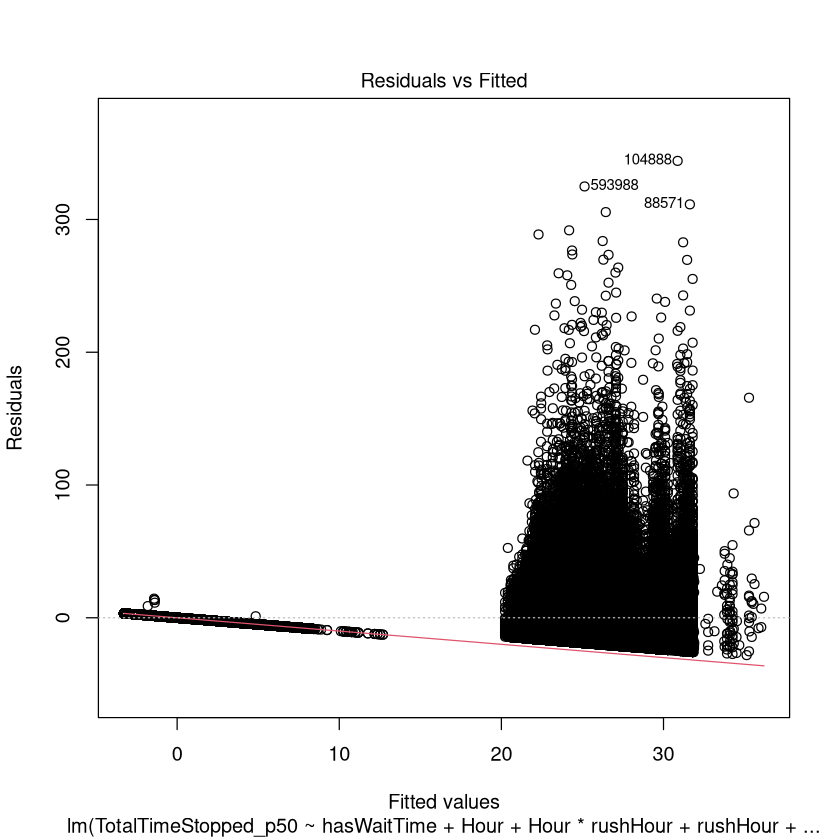

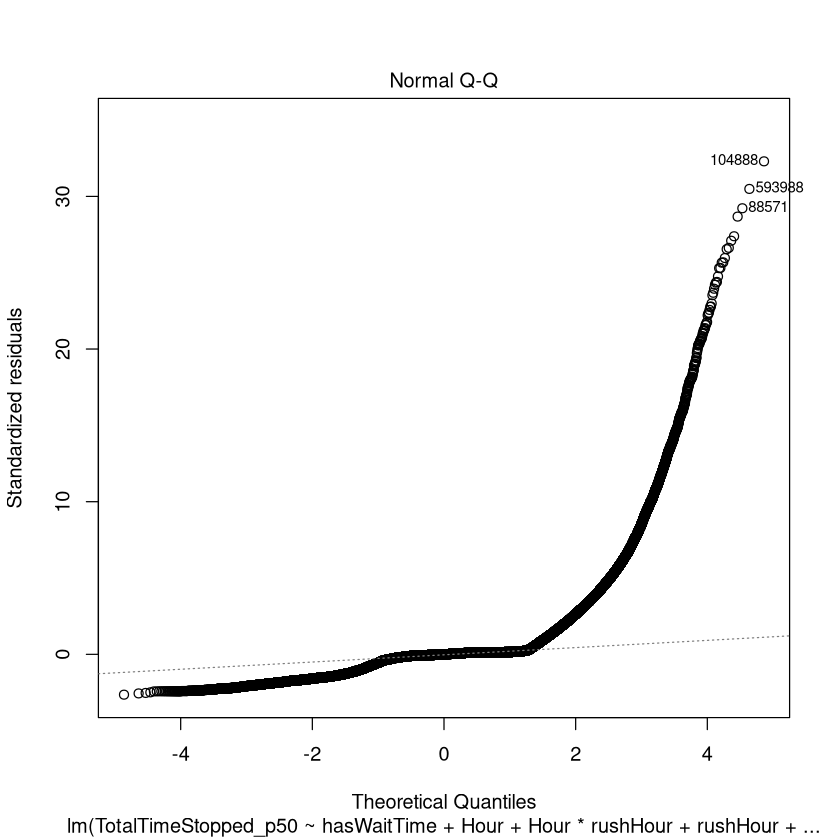

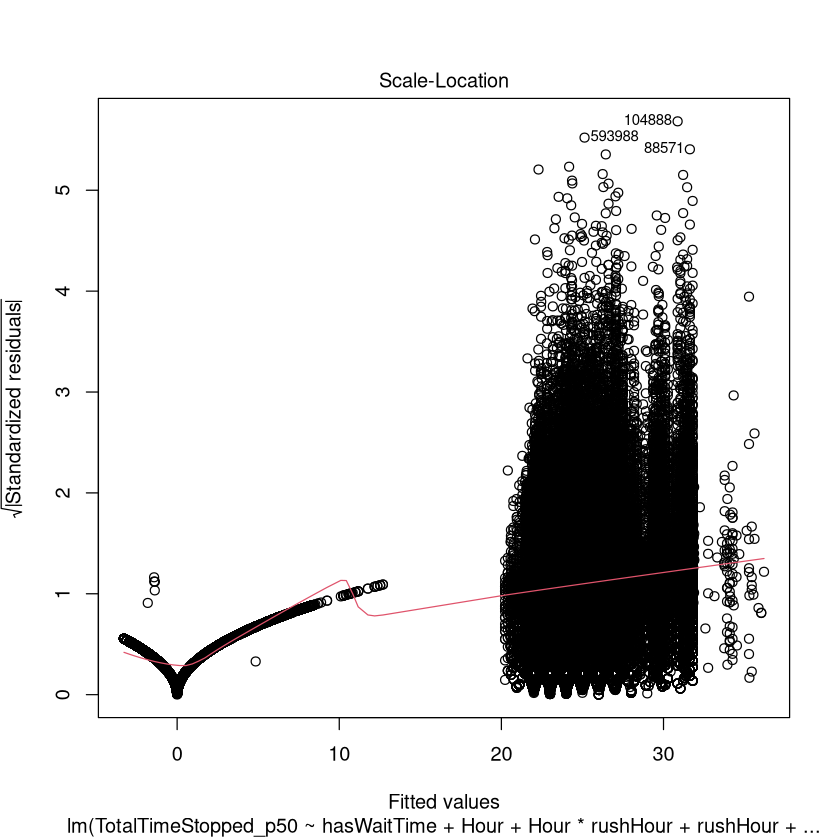

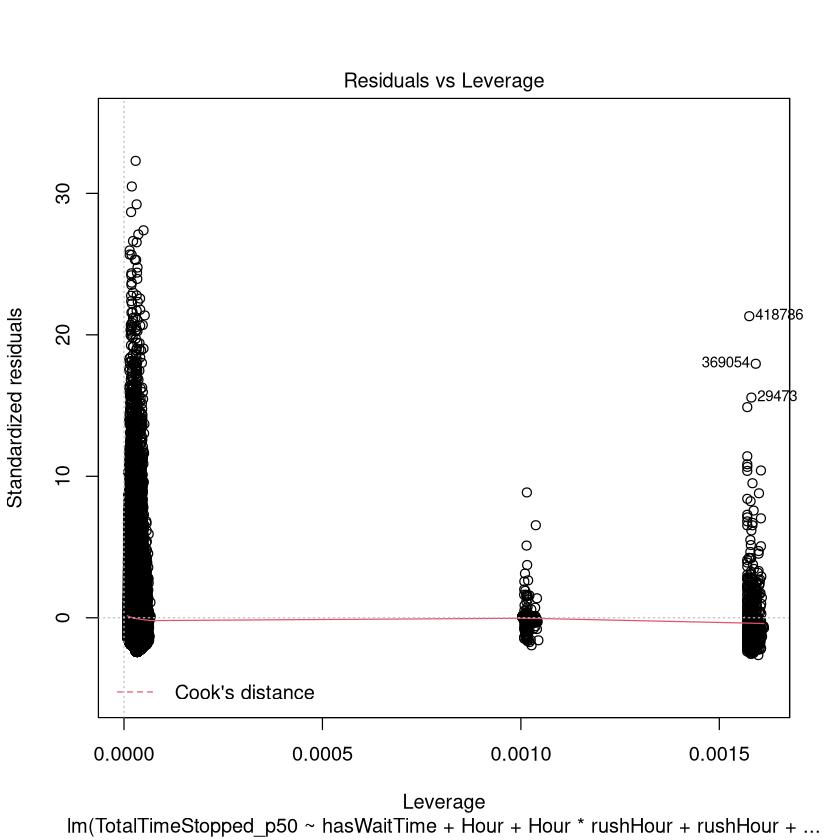

In [30]:
plot(straightInteractionModel)

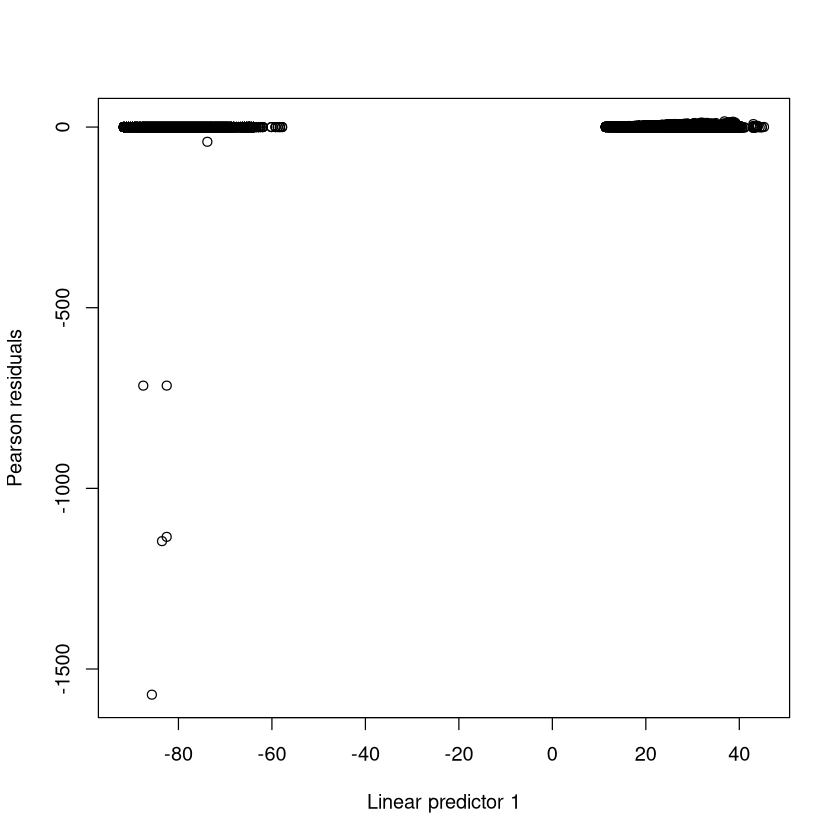

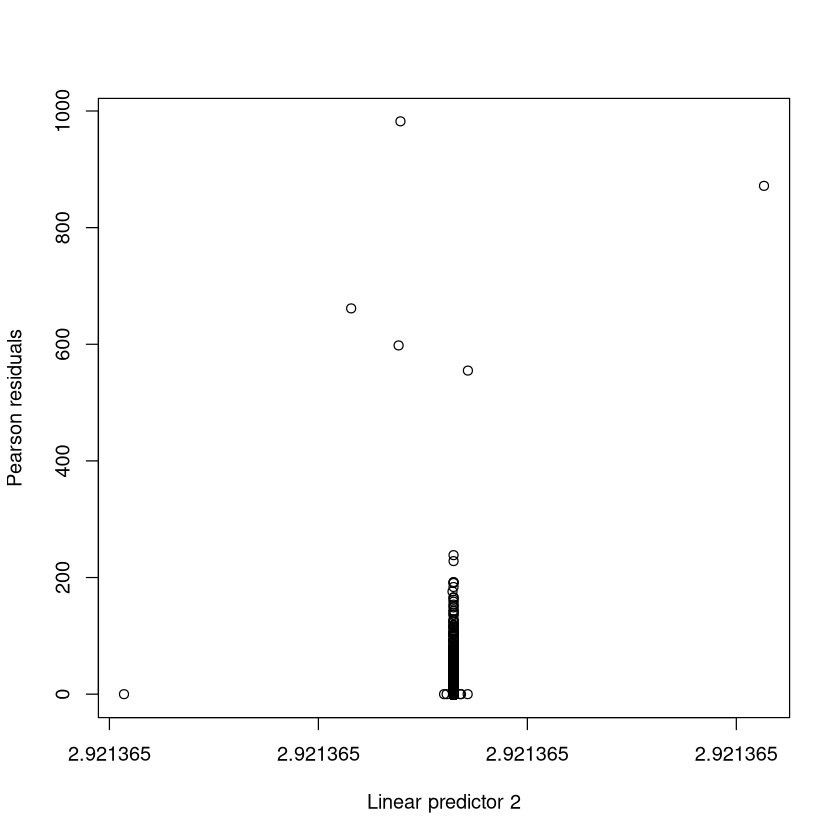

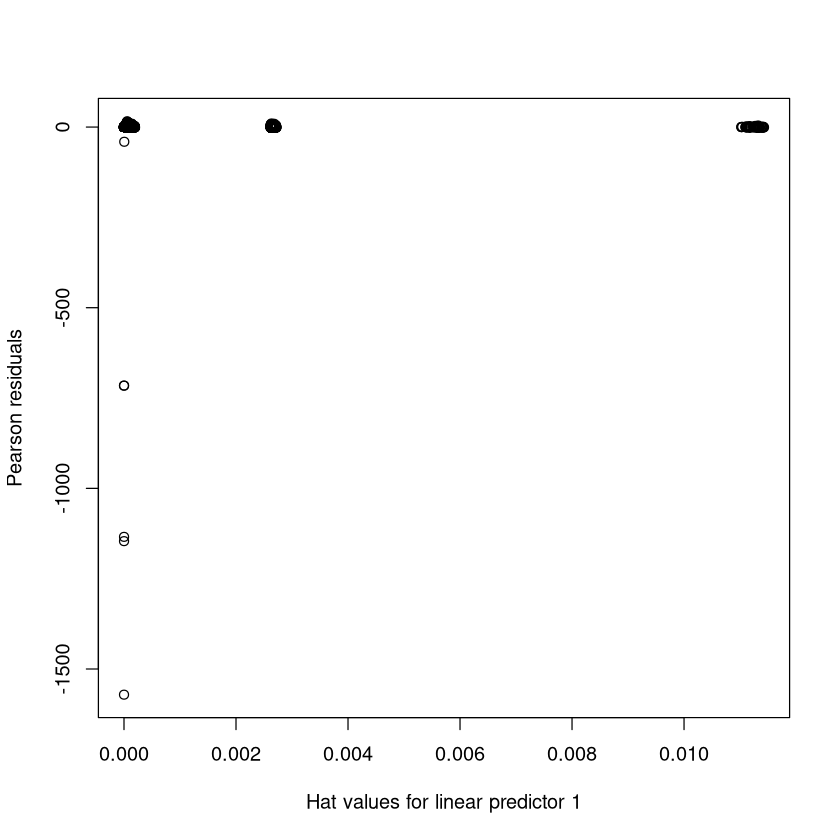

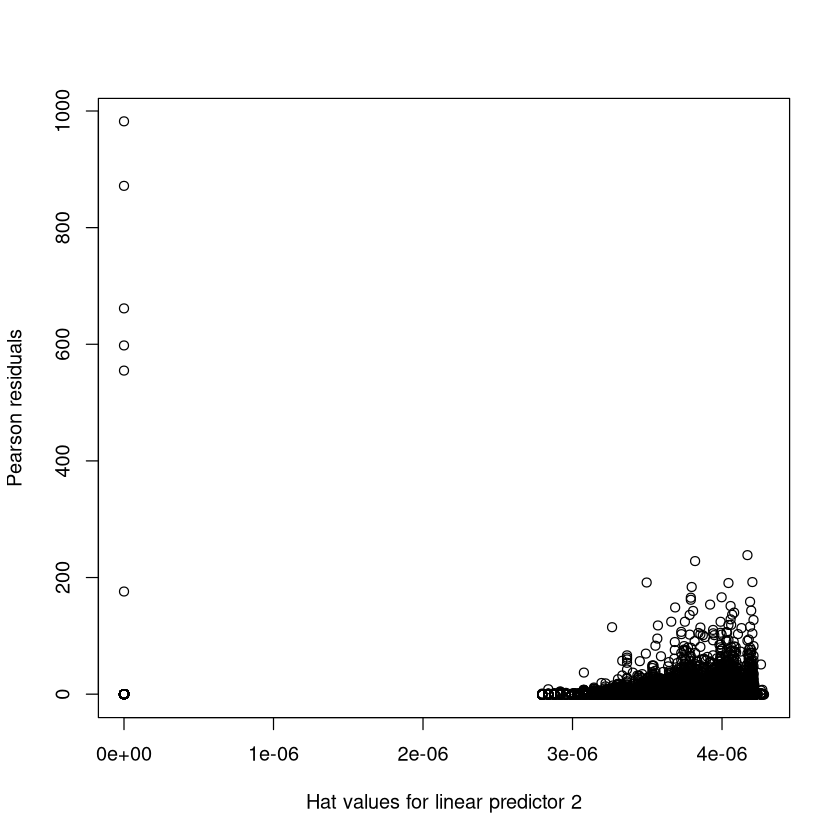

In [31]:
plot(tobitModel)

In [35]:
outPredict1 <- predict(basicLinearModel, newdata=augmentedHoldout, interval="prediction", level=0.8)
outPredict2 <- predict(rushLeftModel, newdata=augmentedHoldout, interval="prediction", level=0.8)
outPredict3 <- predict(rushModel, newdata=augmentedHoldout, interval="prediction",level=0.8)
outPredict4 <- predict(monthModel, newdata=augmentedHoldout, interval="prediction", level =0.8)
outPredict5 <- predict(straightInteractionModel, newdata=augmentedHoldout, interval="prediction", level=0.8)
outPredict6 <- predict(logModel, newdata=augmentedHoldout, interval="prediction", level=0.8)
outPredict7 <- predict(tobitModel, newdata=augmentedHoldout)
        
ineg = which(outPredict7[,1]<0)
outPredict7[ineg,1] = 0
fit <- outPredict7[,1]
lwr <- outPredict7[,1] - qnorm(0.9)*exp(outPredict7[,2])
upr <- outPredict7[,1] + qnorm(0.9)*exp(outPredict7[,2])
outPredict7s <- cbind(fit,lwr,upr)
head(outPredict7s)

temp <- which(augmentedHoldout$TotalTimeStopped_p50 == 0)
logActual <- log(augmentedHoldout$TotalTimeStopped_p50)
logActual[temp] <- 0

IS1_80 <- intervalScore(outPredict1, augmentedHoldout$TotalTimeStopped_p50,0.2)
IS2_80 <- intervalScore(outPredict2, augmentedHoldout$TotalTimeStopped_p50,0.2)
IS3_80 <- intervalScore(outPredict3, augmentedHoldout$TotalTimeStopped_p50,0.2)
IS4_80 <- intervalScore(outPredict4, augmentedHoldout$TotalTimeStopped_p50,0.2)
IS5_80 <- intervalScore(outPredict5, augmentedHoldout$TotalTimeStopped_p50,0.2)
IS6_80 <- intervalScore(outPredict6, logActual,0.2)
IS6_80b <- intervalScore(exp(outPredict6), augmentedHoldout$TotalTimeStopped_p50,0.2)
IS7_80 <- intervalScore(outPredict7s, augmentedHoldout$TotalTimeStopped_p50,0.2)

print(IS1_80)
print(IS2_80)
print(IS3_80)
print(IS4_80)
print(IS5_80)
print(IS6_80)
print(IS6_80b)

print(IS7_80)

outPredict1 <- predict(basicLinearModel, newdata=augmentedHoldout, interval="prediction", level=0.5)
outPredict2 <- predict(rushLeftModel, newdata=augmentedHoldout, interval="prediction", level=0.5)
outPredict3 <- predict(rushModel, newdata=augmentedHoldout, interval="prediction",level=0.5)
outPredict4 <- predict(monthModel, newdata=augmentedHoldout, interval="prediction", level =0.5)
outPredict5 <- predict(straightInteractionModel, newdata=augmentedHoldout, interval="prediction", level=0.5)
outPredict6 <- predict(logModel, newdata=augmentedHoldout, interval="prediction", level=0.5)
outPredict7 <- predict(tobitModel, newdata=augmentedHoldout)
        
ineg = which(outPredict7[,1]<0)
outPredict7[ineg,1] = 0
fit <- outPredict7[,1]
lwr <- outPredict7[,1] - qnorm(0.75)*exp(outPredict7[,2])
upr <- outPredict7[,1] + qnorm(0.75)*exp(outPredict7[,2])
outPredict7s <- cbind(fit,lwr,upr)
head(outPredict7s)

temp <- which(augmentedHoldout$TotalTimeStopped_p50 == 0)
logActual <- log(augmentedHoldout$TotalTimeStopped_p50)
logActual[temp] <- 0


IS1_50 <- intervalScore(outPredict1, augmentedHoldout$TotalTimeStopped_p50,0.5)
IS2_50 <- intervalScore(outPredict2, augmentedHoldout$TotalTimeStopped_p50,0.5)
IS3_50 <- intervalScore(outPredict3, augmentedHoldout$TotalTimeStopped_p50,0.5)
IS4_50 <- intervalScore(outPredict4, augmentedHoldout$TotalTimeStopped_p50,0.5)
IS5_50 <- intervalScore(outPredict5, augmentedHoldout$TotalTimeStopped_p50,0.5)
IS6_50 <- intervalScore(outPredict6, logActual,0.5)
IS6_50b <- intervalScore(exp(outPredict6), augmentedHoldout$TotalTimeStopped_p50,0.5)
IS7_50 <- intervalScore(outPredict7s, augmentedHoldout$TotalTimeStopped_p50,0.5)

print(IS1_50)
print(IS2_50)
print(IS3_50)
print(IS4_50)
print(IS5_50)
print(IS6_50)
print(IS6_50b)

print(IS7_50)


,fit,lwr,upr
1,0.00000,-23.794078,23.79408
2,0.00000,-23.794078,23.79408
3,30.25493,6.460853,54.04901
4,0.00000,-23.794078,23.79408
5,30.48731,6.693234,54.28139
6,0.00000,-23.794078,23.79408


[1]  0.8000000 27.3935743 39.0925275  0.8795369
[1]  0.8000000 27.3931130 39.0916644  0.8796771
[1]  0.800000 27.342806 39.027377  0.880972
[1]  0.800000 27.342497 39.026574  0.880958
[1]  0.8000000 27.3105961 38.9901533  0.8807537
[1] 0.8000000 0.9716909 1.5651911 0.8370375
[1]  0.8000000  6.8509260 27.9422828  0.1530605
[1]  0.8000000 47.5881565 53.0613985  0.9672006


,fit,lwr,upr
1,0.00000,-12.52299,12.52299
2,0.00000,-12.52299,12.52299
3,30.25493,17.73194,42.77793
4,0.00000,-12.52299,12.52299
5,30.48731,17.96432,43.01031
6,0.00000,-12.52299,12.52299


[1]  0.5000000 14.4174290 23.5073881  0.7821592
[1]  0.5000000 14.4171862 23.5069476  0.7822281
[1]  0.5000000 14.3907094 23.4629846  0.7812601
[1]  0.5000000 14.3905467 23.4625568  0.7811679
[1]  0.5000000 14.3737570 23.4379430  0.7802536
[1] 0.5000000 0.5114077 0.9300400 0.7676599
[1]  0.50000000  3.50556209 16.11554448  0.08475841
[1]  0.5000000 25.0459869 30.3650027  0.8721267


	fit	lwr	upr
1	0.00000	-23.794078	23.79408
2	0.00000	-23.794078	23.79408
3	30.25493	6.460853	54.04901
4	0.00000	-23.794078	23.79408
5	30.48731	6.693234	54.28139
6	0.00000	-23.794078	23.79408
[1]  0.8000000 27.3935743 39.0925275  0.8795369
[1]  0.8000000 27.3931130 39.0916644  0.8796771
[1]  0.800000 27.342806 39.027377  0.880972
[1]  0.800000 27.342497 39.026574  0.880958
[1]  0.8000000 27.3105961 38.9901533  0.8807537
[1] 0.8000000 0.9716909 1.5651911 0.8370375
[1]  0.8000000  6.8509260 27.9422828  0.1530605
[1]  0.8000000 47.5881565 53.0613985  0.9672006
A matrix: 6 × 3 of type dbl
fit	lwr	upr
1	0.00000	-12.52299	12.52299
2	0.00000	-12.52299	12.52299
3	30.25493	17.73194	42.77793
4	0.00000	-12.52299	12.52299
5	30.48731	17.96432	43.01031
6	0.00000	-12.52299	12.52299
[1]  0.5000000 14.4174290 23.5073881  0.7821592
[1]  0.5000000 14.4171862 23.5069476  0.7822281
[1]  0.5000000 14.3907094 23.4629846  0.7812601
[1]  0.5000000 14.3905467 23.4625568  0.7811679
[1]  0.5000000 14.3737570 23.4379430  0.7802536
[1] 0.5000000 0.5114077 0.9300400 0.7676599
[1]  0.50000000  3.50556209 16.11554448  0.08475841
[1]  0.5000000 25.0459869 30.3650027  0.8721267